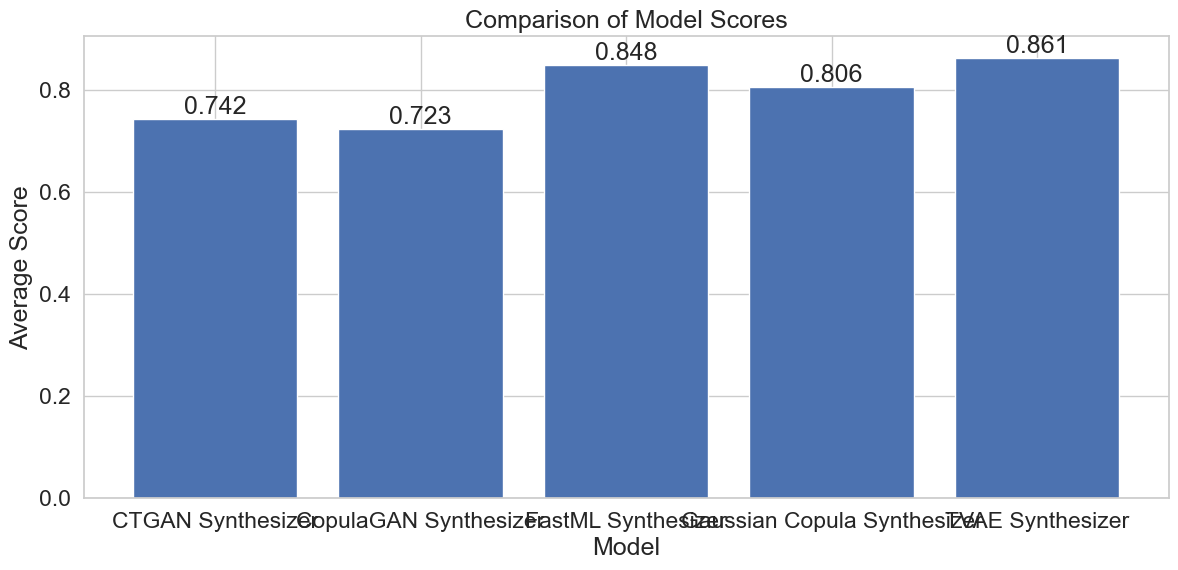

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from a CSV file
data = pd.read_csv('results.csv')

# Group the data by model and calculate the average score for each model
grouped_data = data.groupby('model')['score'].mean()

# Set the figure size
plt.figure(figsize=(14, 6))  # Increase the width to 14 inches

# Plot the average scores of the models
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Model')
plt.ylabel('Average Score')
plt.title('Comparison of Model Scores')

# Add labels to the bars
for i, v in enumerate(grouped_data.values):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

# Display the plot
plt.show()


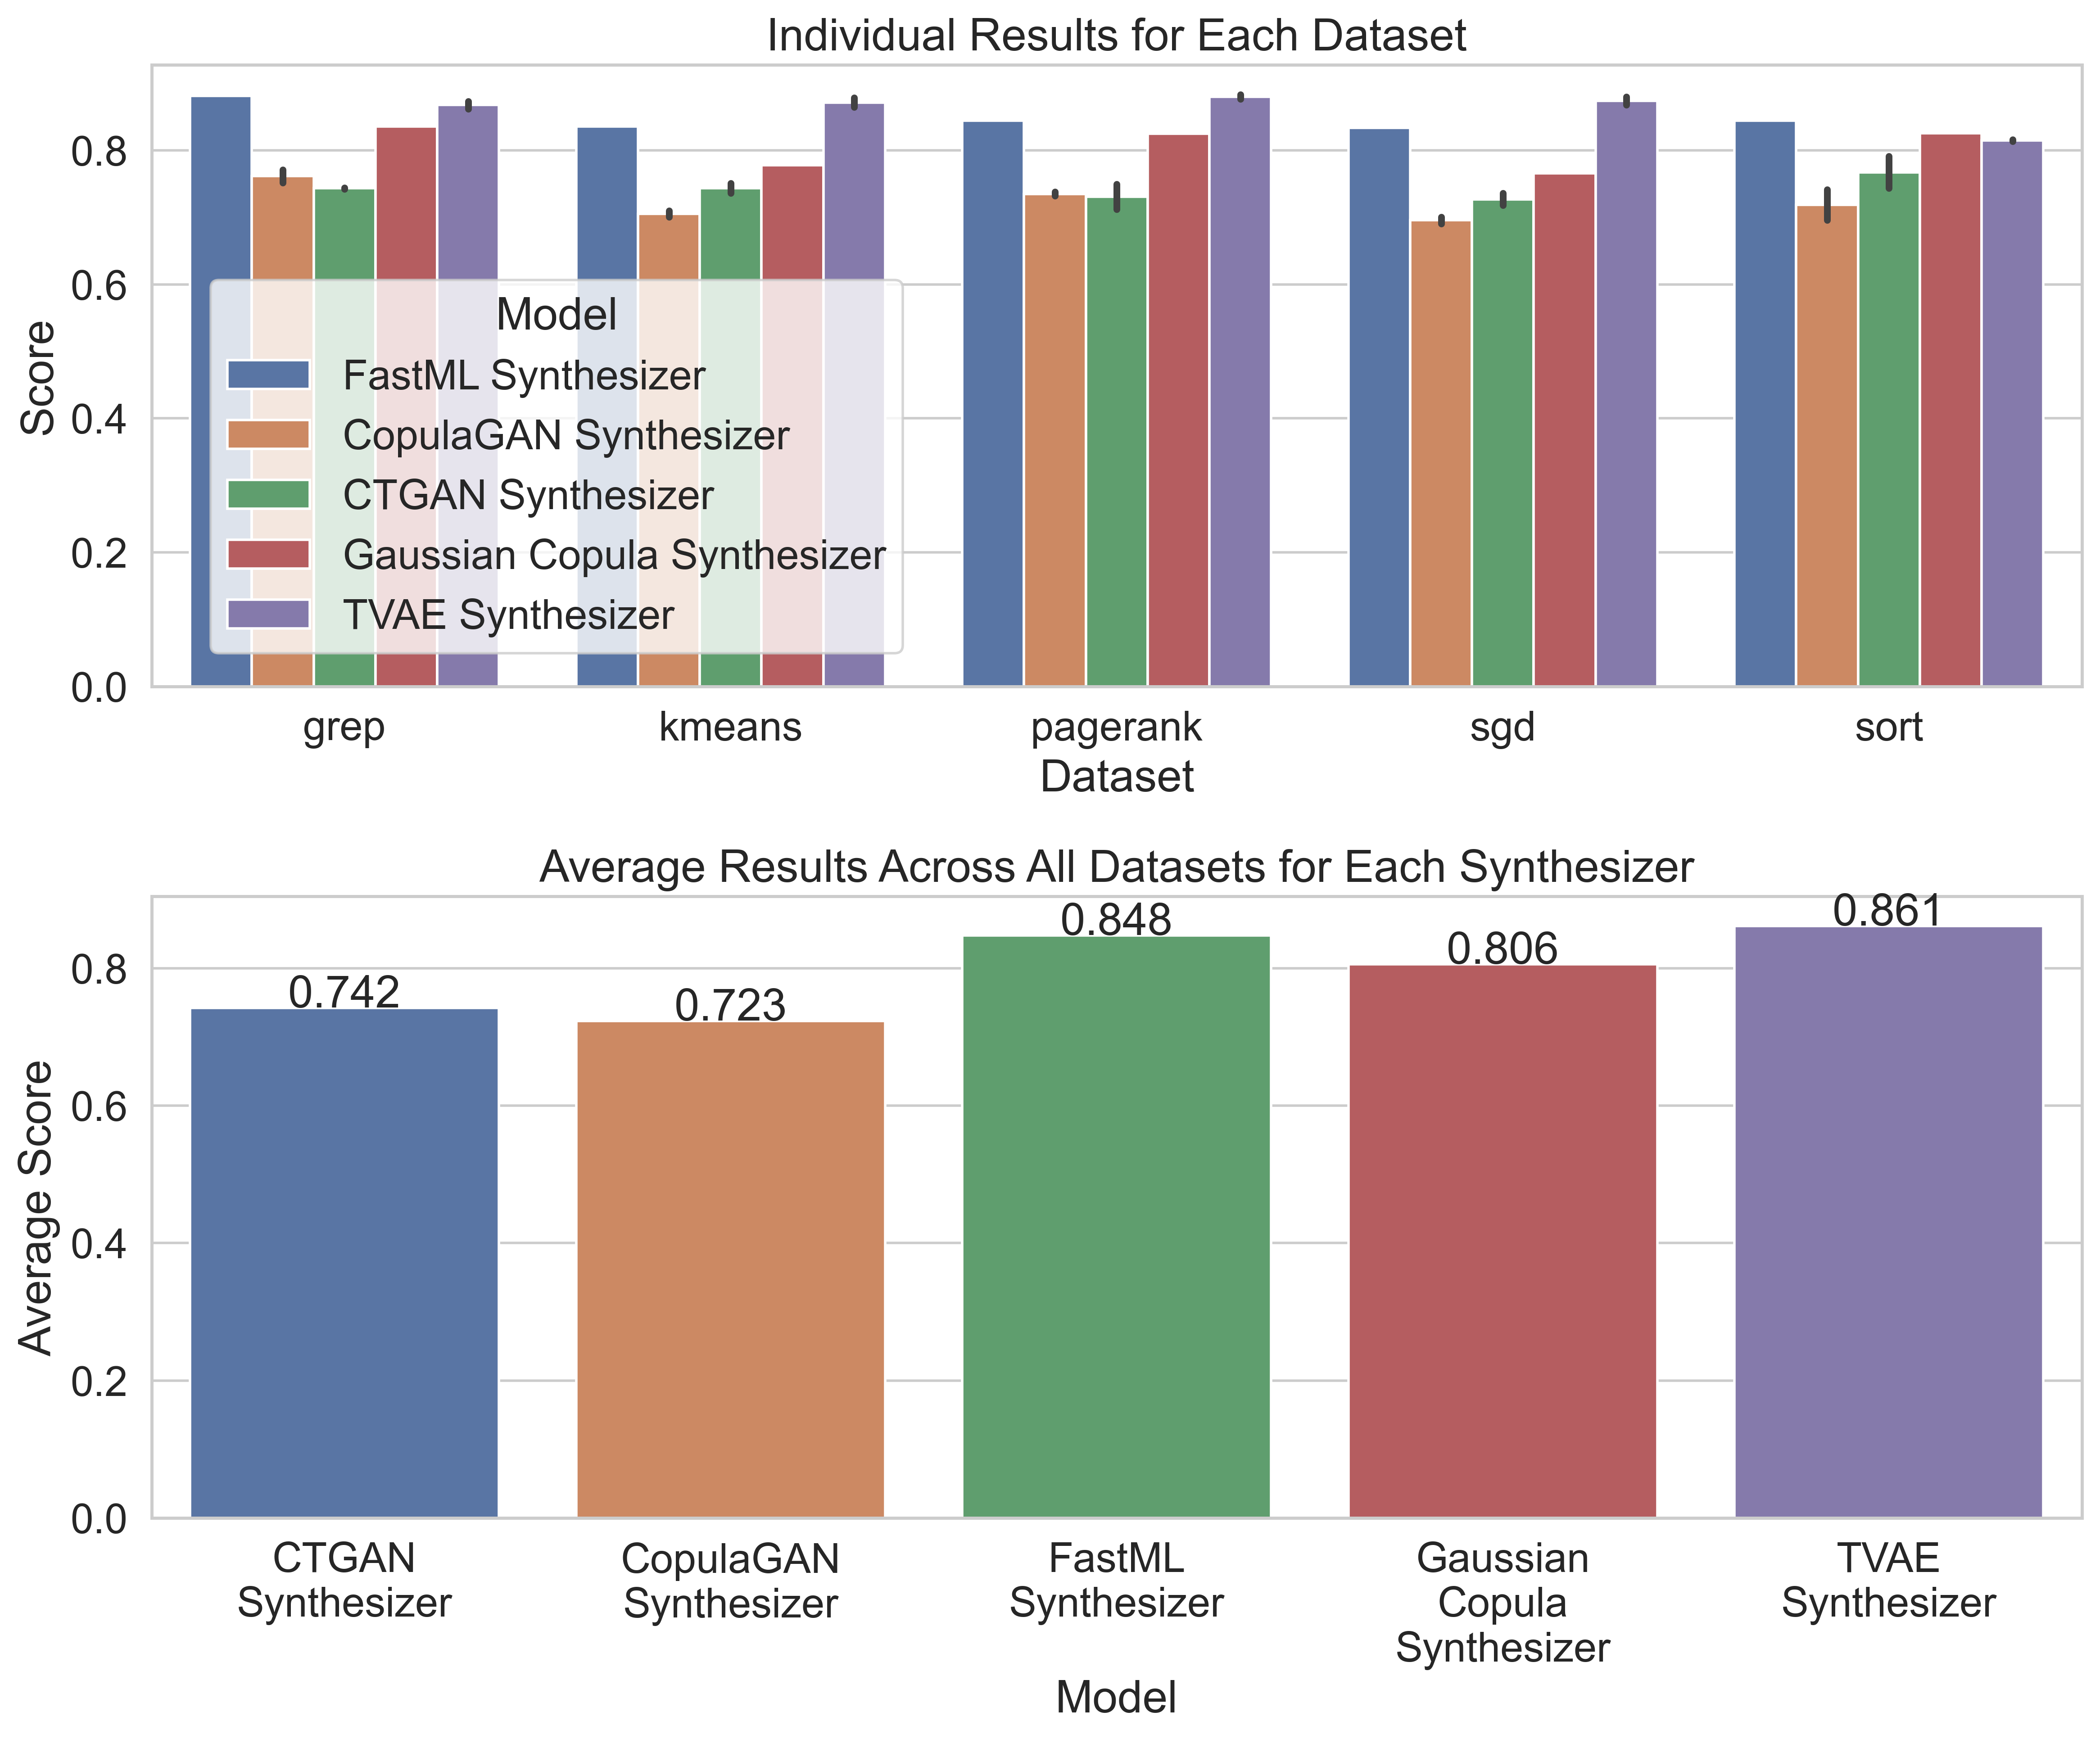

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

# Create a combined bar plot with high resolution
plt.figure(figsize=(12, 10), dpi=400)

# Individual results for each dataset
plt.subplot(2, 1, 1)
sns.barplot(data=data, x='file', y='score', hue='model')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.title('Individual Results for Each Dataset')
legend = plt.legend(title='Model', loc='lower left', bbox_to_anchor=(0.02, 0.02),frameon=True, framealpha=0.8, ncol=1)
#legend.get_frame().set_facecolor('#B0E0E6')  # Set background color of legend frame
plt.xticks(rotation=0)  # Horizontal labels

# Average results across all datasets for each synthesizer
average_scores = data.groupby('model')['score'].mean().reset_index()
plt.subplot(2, 1, 2)
sns.barplot(data=average_scores, x='model', y='score')
plt.xlabel('Model')
plt.ylabel('Average Score')
plt.title('Average Results Across All Datasets for Each Synthesizer')

# Modify synthesizer names for line breaks after spaces
synthesizer_names = average_scores['model'].tolist()
synthesizer_names_formatted = [name.replace(' ', '\n') for name in synthesizer_names]
plt.xticks(range(len(synthesizer_names_formatted)), synthesizer_names_formatted, rotation=0)  # Horizontal labels

# Annotate individual scores on the top subplot
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.3f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


## Context
Comparison of synthesizers based on chatgpt and docs. 

1. CTGANSynthesizer:
   - The CTGAN Synthesizer uses GAN-based, deep learning methods to train a model and generate synthetic data. 
   - Based on Generative Adversarial Networks (GANs) and conditional transformations.
   - Captures conditional distributions of variables using transformations.
   - Can handle both categorical and continuous variables.
   - Allows for the generation of synthetic data conditioned on specific attribute values.
   - Requires training on a real dataset to learn the conditional distributions.

2. CopulaGANSynthesizer:
   - The Copula GAN Synthesizer uses a mix classic, statistical methods and GAN-based deep learning methods to train a model and generate synthetic data.
   - Based on Generative Adversarial Networks (GANs) and copula theory.
   - Utilizes copula functions to model the joint distribution of variables.
   - Can capture complex dependencies between variables.
   - Suitable for generating multivariate synthetic data.
   - Requires training on a real dataset to learn the underlying distribution.


3. GaussianCopulaSynthesizer:
   - The Gaussian Copula Synthesizer uses classic, statistical methods to train a model and generate synthetic data.
   - Based on copula theory and Gaussian distributions.
   - Models the joint distribution of variables using Gaussian copulas.
   - Assumes that the marginal distributions of variables are Gaussian.
   - Useful for modeling continuous variables with known or assumed marginal distributions.
   - May not capture complex dependencies or handle categorical variables as effectively as other methods.

4. Fast-ML Synthesizer
   - The Fast ML Preset synthesizer is optimized for modeling speed. This is a great choice for first time SDV users. Use it to quickly get started with synthetic data.

5. TVAESynthesizer:
   - The TVAE Synthesizer uses a variational autoencoder (VAE)-based, neural network techniques to train a model and generate synthetic data.
   - Based on Variational Autoencoders (VAEs).
   - Learns a low-dimensional representation of the data using an encoder network.
   - Generates synthetic data by sampling from the learned latent space and decoding it with a decoder network.
   - Suitable for generating continuous or categorical data.
   - Can handle missing data in the training set by learning a reconstruction model.

